In [1]:
from pyspark import SparkConf, SparkContext

In [2]:
conf = SparkConf().setMaster("local").setAppName("bus-stop")
sc = SparkContext(conf=conf)

22/11/07 21:14:08 WARN Utils: Your hostname, imhaneul-ui-MacBookPro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.130 instead (on interface en0)
22/11/07 21:14:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/07 21:14:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
import os
from pathlib import Path

directory = f"{Path(os.getcwd()).resolve().parent}/data"
csv_file = "bus.csv"

data = sc.textFile(f"file:///{directory}/{csv_file}")
header = data.first()
filetred_lines = data.filter(lambda row: row != header)
lines_split = filetred_lines.map(lambda x: x.split(",")[-1])

In [4]:
count = lines_split.countByValue()

In [6]:
import pandas as pd 
pd.Series(count).to_csv("city_count.csv", header=None)

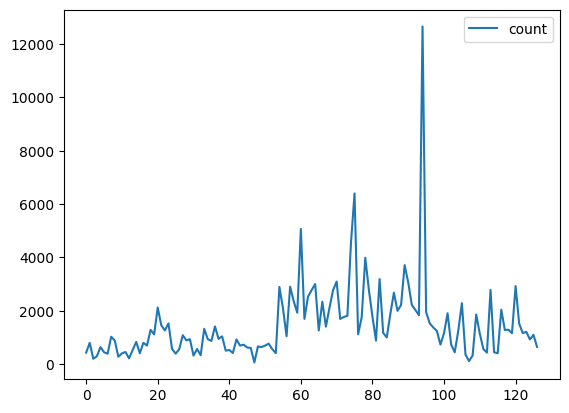

In [7]:
import matplotlib.pyplot as plt 

data = pd.read_csv(f"{Path(os.getcwd()).resolve().parent}/city_count.csv", names=["city", "count"])
data.plot()
plt.show()

In [ ]:
sc.stop()

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("bus").getOrCreate()

In [9]:
a = spark.read.csv(f"{Path(os.getcwd()).resolve().parent}/city_count.csv", inferSchema=True, header=None)
data_frame = a.createOrReplaceTempView("bus")

In [11]:
qs = """
select 
    *
from 
    bus
where 
    _c0 like '%광역%' or 
    _c0 like '%특별%' 
"""

spark.sql(qs).show()

+----------+-----+
|       _c0|  _c1|
+----------+-----+
|대구광역시| 5068|
|대전광역시| 3005|
|광주광역시| 3099|
|인천광역시| 6401|
|세종특별시| 2684|
|울산광역시| 3714|
|서울특별시|12658|
+----------+-----+



In [13]:
qs = """
select 
    *
from 
    bus
"""
spark.sql(qs).show()

+------+----+
|   _c0| _c1|
+------+----+
|태백시| 434|
|삼척시| 801|
|속초시| 203|
|동해시| 301|
|영월군| 639|
|정선군| 449|
|인제군| 393|
|고성군|1029|
|홍천군| 889|
|철원군| 280|
|양양군| 406|
|평창군| 458|
|양구군| 218|
|진천군| 533|
|괴산군| 836|
|단양군| 410|
|영동군| 803|
|음성군| 698|
|논산시|1287|
|부여군|1119|
+------+----+
only showing top 20 rows

